## Coding Exercise #0402

### 1. K-Means clustering with real data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')           # Turn off the warnings. 
%matplotlib inline

#### 1.1. Load the 'Iris' dataset from Seaborn:

In [2]:
df = sns.load_dataset('iris')
X = df.drop(columns=['species'])                        # Only X variables.
Y = df['species']                                       # Only Y variable.
header_X = X.columns                                    # Store the column names of X.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1.2. Apply k-means:

In [5]:
# # Q: Apply and fit KMeans to the Iris dataset for 3 clusters.
kmeans = KMeans(n_clusters=3, random_state=123)      # kmeans object for 3 clusters. radom_state=123
kmeans.fit(X)     # Unsupervised learning => Only X.
res = pd.Series(kmeans.labels_)                         # Cluster labeling result as Series.
df['cluster'] = kmeans.labels_                                     # Add the cluster column to the original dataset.

In [6]:
# Frequency table of the observations labeled as '0'.
# This cluster has the majority 'virginica'.
case0 = Y[res==0]
print(case0.value_counts())

species
virginica     36
versicolor     2
Name: count, dtype: int64


In [7]:
# Frequency table of the observations labeled as '1'.
# This cluster corresponds entirely to 'setosa'.
case1 = Y[res==1]
print(case1.value_counts())

species
setosa    50
Name: count, dtype: int64


In [8]:
# Frequency table of the observations labeled as '2'.
# This cluster has the majority 'versicolor'.
case2 = Y[res==2]
print(case2.value_counts())

species
versicolor    48
virginica     14
Name: count, dtype: int64


In [9]:
# A list that contains the learned labels.
learnedLabels = ['Virginica','Setosa','Versicolor']  

In [10]:
# Print out the cluster centers (centroids).
np.round(pd.DataFrame(kmeans.cluster_centers_,columns=header_X,index=['Cluster 0','Cluster 1','Cluster 2']),2)

,sepal_length,sepal_width,petal_length,petal_width
Cluster 0,6.85,3.07,5.74,2.07
Cluster 1,5.01,3.43,1.46,0.25
Cluster 2,5.90,2.75,4.39,1.43


#### 1.3. Visualize:

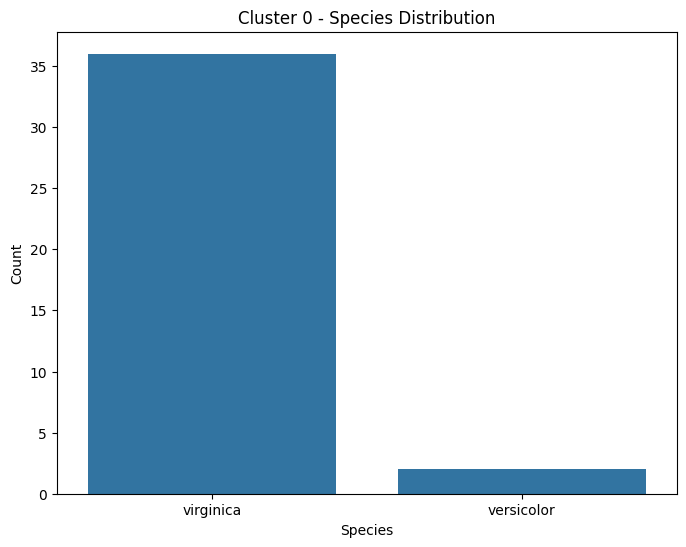

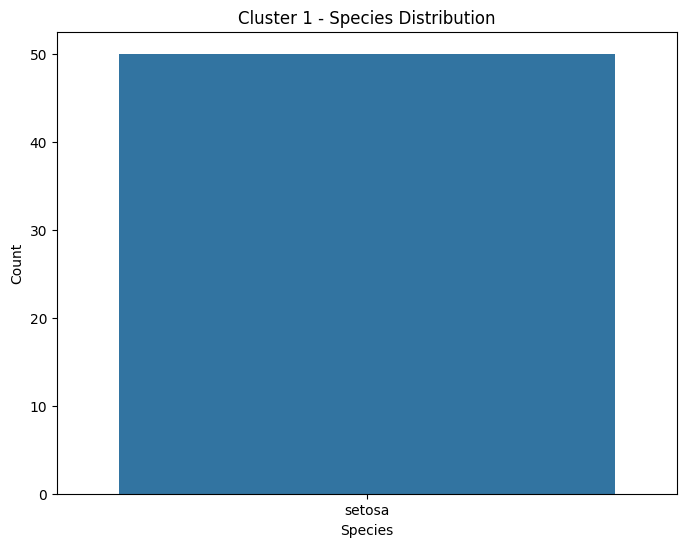

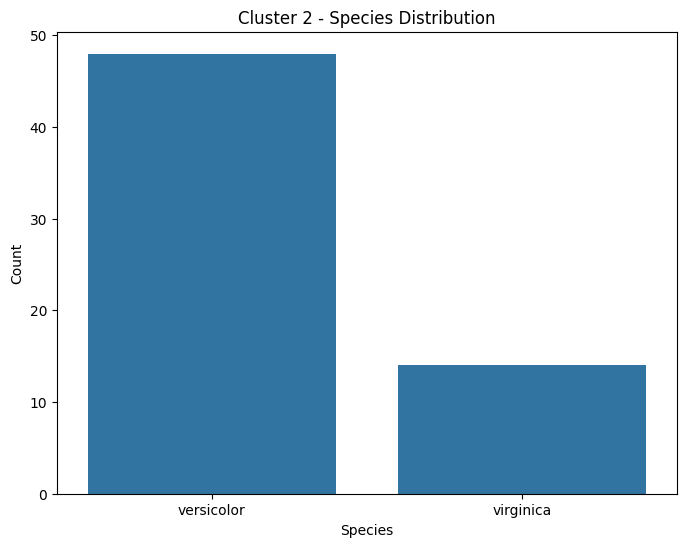

In [11]:
# Visualize the labeling content of the cluster 0, 1 & 2. 
case0_counts = case0.value_counts()
case1_counts = case1.value_counts()
case2_counts = case2.value_counts()

# Create a bar plot for cluster 0
plt.figure(figsize=(8, 6))
sns.barplot(x=case0_counts.index, y=case0_counts.values)
plt.title('Cluster 0 - Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Create a bar plot for cluster 1
plt.figure(figsize=(8, 6))
sns.barplot(x=case1_counts.index, y=case1_counts.values)
plt.title('Cluster 1 - Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Create a bar plot for cluster 2
plt.figure(figsize=(8, 6))
sns.barplot(x=case2_counts.index, y=case2_counts.values)
plt.title('Cluster 2 - Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

#### 1.4. Prediction based on what we have learned:

In [12]:
# Q: For a given observation of X, predict (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) 
# the species from what we have learned. 
# Case #1.
X_test = {'sepal_length': [7.0] ,'sepal_width': [3.0] , 'petal_length': [5.0]  ,'petal_width': [1.5] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 0 with the most probable label 'Virginica'


In [13]:
# Q: For a given observation of X, predict (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) 
# the species from what we have learned.
# Case #2.
X_test = {'sepal_length': [4.5] ,'sepal_width': [3.0] , 'petal_length': [1.0]  ,'petal_width': [1.0] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 1 with the most probable label 'Setosa'


In [14]:
# Q: For a given observation of X, predict (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) 
# the species from what we have learned.
# Case #3.
X_test = {'sepal_length': [6.0] ,'sepal_width': [3.0] , 'petal_length': [4.0]  ,'petal_width': [1.0] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 2 with the most probable label 'Versicolor'
